<a href="https://colab.research.google.com/github/PurraSujay/DataScience-Project/blob/main/IPL_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IPL Data Analysis Project**

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt 
%matplotlib inline

pd.set_option('display.max_columns', None)
warnings.simplefilter("ignore")
sns.set_style('darkgrid')

**Reading dataset i.e matches.csv**


In [2]:
''' reading dataset i.e matches.csv '''
df_matches = pd.read_csv('matches.csv')

In [4]:
df_matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
''' shape of dataset '''
df_matches.shape

(756, 18)

In [6]:
''' checking null values '''
df_matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
''' checking unique values in column Season '''
df_matches.Season.unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

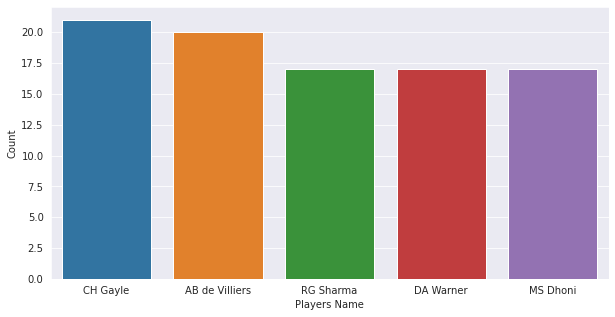

In [8]:
''' barplot of top 5 most player_of_match ''' 
pom = df_matches.player_of_match.value_counts().nlargest(5)
plt.figure(figsize=(10, 5))
sns.barplot(pom.index, pom)
plt.xlabel('Players Name')
plt.ylabel('Count');

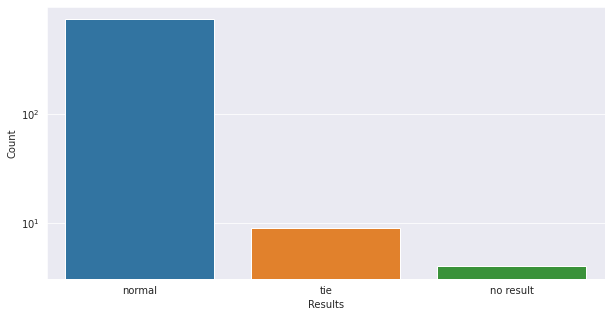

In [9]:
''' value counts of results '''
result_label = df_matches.result.value_counts()

''' barplot '''
plt.figure(figsize=(10, 5))
sns.barplot(result_label.index, result_label, log=True)
plt.xlabel('Results')
plt.ylabel('Count');

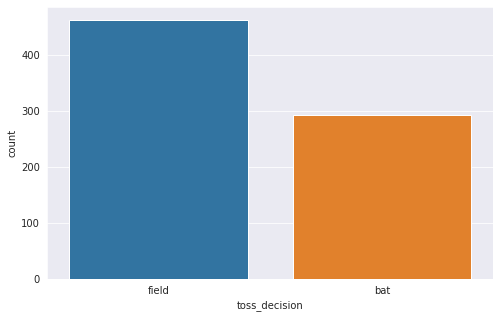

In [10]:
''' count plot of toss_decision'''
plt.figure(figsize=(8, 5))
sns.countplot(df_matches.toss_decision);

In [11]:
''' groupby by winner '''
df_matches.groupby('winner')['toss_decision'].value_counts()

winner                       toss_decision
Chennai Super Kings          bat              52
                             field            48
Deccan Chargers              field            15
                             bat              14
Delhi Capitals               field             8
                             bat               2
Delhi Daredevils             field            38
                             bat              29
Gujarat Lions                field            11
                             bat               2
Kings XI Punjab              field            61
                             bat              21
Kochi Tuskers Kerala         field             6
Kolkata Knight Riders        field            57
                             bat              35
Mumbai Indians               field            64
                             bat              45
Pune Warriors                bat               9
                             field             3
Rajasthan Royals          

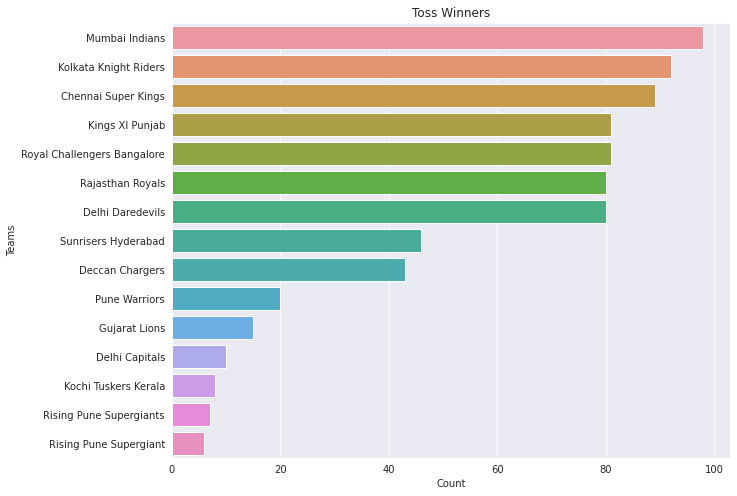

In [12]:
''' barplot of most toss winners '''
toss_win_label = df_matches.toss_winner.value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(toss_win_label, toss_win_label.index);
plt.ylabel('Teams')
plt.xlabel('Count')
plt.title('Toss Winners');

In [13]:
'''teams did fielding first and result was normal '''
df_matches[(df_matches['toss_decision'] == 'field') & (df_matches['result'] == 'normal')].head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN


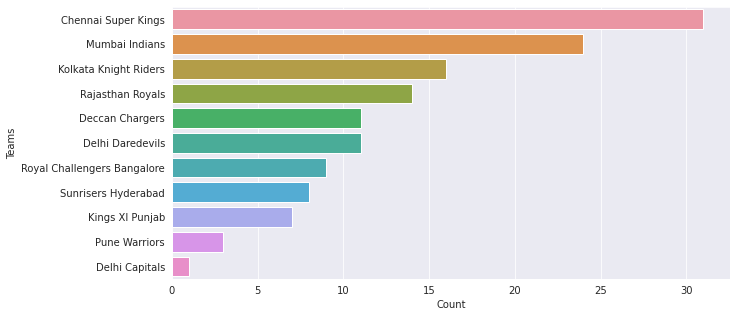

In [15]:
''' teams did batting first and won'''
win = df_matches[(df_matches.toss_decision == 'bat') & (df_matches.win_by_runs != 0)]['winner'].value_counts().sort_values(ascending=False)

'''barplot'''
plt.figure(figsize=(10, 5))
sns.barplot(win, win.index)
plt.xlabel('Count')
plt.ylabel('Teams');


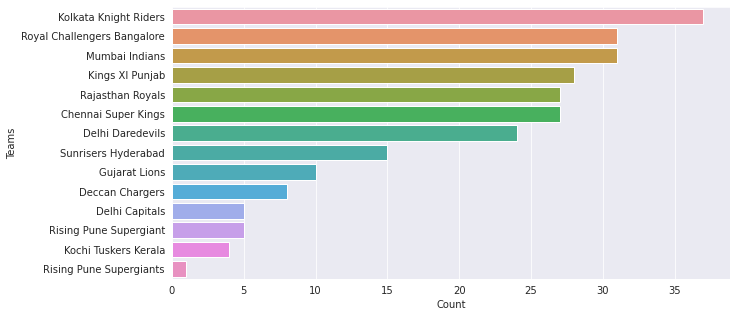

In [16]:
''' teams did bowling first and won'''
win = df_matches[(df_matches.toss_decision == 'field') & (df_matches.win_by_wickets != 0)]['winner'].value_counts().sort_values(ascending=False)

'''barplot'''
plt.figure(figsize=(10, 5))
sns.barplot(win, win.index)
plt.xlabel('Count')
plt.ylabel('Teams');

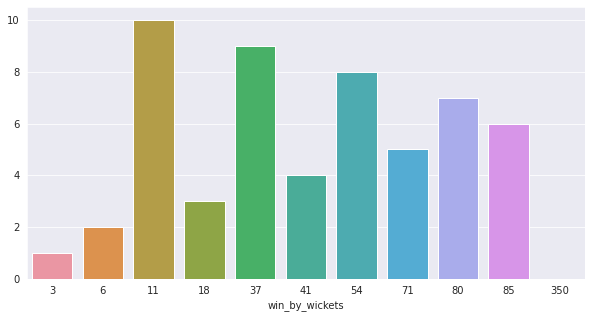

In [17]:
''' barplot of won_by_wickets '''
plt.figure(figsize=(10, 5))
sns.barplot(df_matches.win_by_wickets.value_counts(), df_matches.win_by_wickets.value_counts().index)

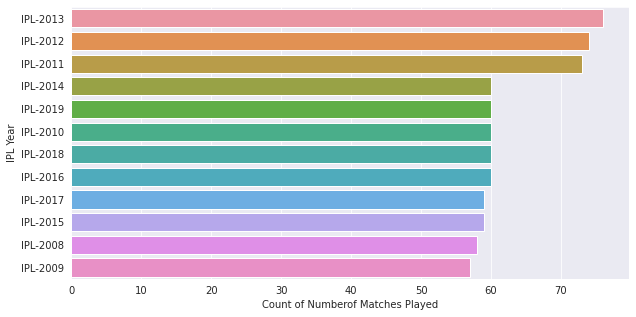

In [18]:
''' number of matches played each year '''
season = df_matches['Season'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(season, season.index)
plt.ylabel('IPL Year')
plt.xlabel('Count of Numberof Matches Played');

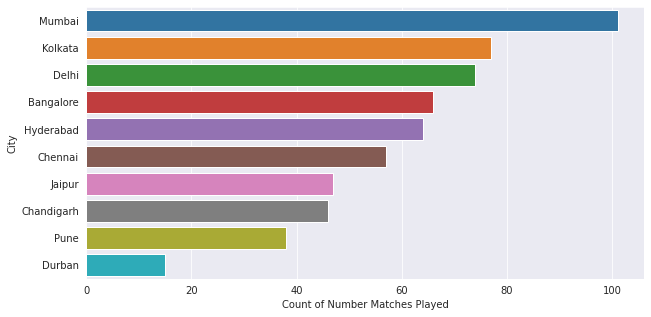

In [19]:
''' number of matches played in top 10 city '''
city = df_matches['city'].value_counts().sort_values().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(city, city.index)
plt.ylabel('City')
plt.xlabel('Count of Number Matches Played');

**''' analysis on deliveries data file'''**

In [20]:
''' analysis on deliveries data file'''
df_deliveries = pd.read_csv('deliveries.csv')

In [21]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [22]:
df_deliveries.shape

(179078, 21)

In [23]:
''' match id 1'''
df_match1 = df_deliveries[df_deliveries.match_id == 1]

''' top 5 rows '''
df_match1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [24]:
''' shape of match id 1'''
df_match1.shape

(248, 21)

In [25]:
df_match1.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore'], dtype=object)

In [26]:
''' 1st inning '''
srh = df_match1[df_match1['inning'] == 1]

In [27]:
srh.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [28]:
srh['dismissal_kind'].value_counts()

caught    3
bowled    1
Name: dismissal_kind, dtype: int64

In [29]:
''' total number of balls bowled by srh '''
len(srh.ball)

125

In [30]:
''' count of 4s hit by srh '''
len(srh[srh.total_runs == 4])

17

In [31]:
''' count of 6s hit by srh '''
len(srh[srh.total_runs == 6])

9

In [32]:

'''  2nd innings '''
rcb = df_match1[df_match1.inning == 2]

In [33]:
rcb.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [34]:
rcb['dismissal_kind'].value_counts()

caught     6
run out    2
bowled     2
Name: dismissal_kind, dtype: int64

In [35]:
''' total number of balls bowled by rcb '''
len(rcb.ball)

123

In [36]:
''' count of 4s hit by rcb '''
len(rcb[rcb.total_runs == 4])

15

In [37]:
''' count of 6s hit by rcb '''
len(rcb[rcb.total_runs == 6])

8